- ## <font color = red> Road Accident Casualties Across Calderdale :


Information on all road accident casualties across Calderdale. Data includes location, number of people and vehicles involved, road surface, weather conditions and severity of any casualties. Please note ----------- * The Eastings and Northings are generated at the roadside where the accident occurred. Sometimes due to poor internet connectivity this data is may not be as accurate as it could be. A useful tool to analyse the data is Excel pivot tables, these help summarise large amounts of data in a easy to view table. The road casualty pdf reports refer to casualties who were killed or seriously injured, whereas the accident data refers to all road casualties.
1st Road Class	1st Road Class Desc
- 1	Motorway
- 2	A(M)
- 3	A
- 4	B
- 5	C
- 6	Unclassified
	
> - Road Surface	Road Surface Desc
- 1	Dry
- 2	Wet / Damp
- 3	Snow
- 4	Frost / Ice
- 5	Flood (surface water over 3cm deep)
	
> - Lighting Conditions	Lighting Conditions Desc
- 1	Daylight: street lights present
- 2	Daylight: no street lighting
- 3	Daylight: street lighting unknown
- 4	Darkness: street lights present and lit
- 5	Darkness: street lights present but unlit
- 6	Darkness: no street lighting
- 7	Darkness: street lighting unknown
	
> - Weather Conditions	Weather Conditions Desc
- 1	Fine without high winds
- 2	Raining without high winds
- 3	Snowing without high winds
- 4	Fine with high winds
- 5	Raining with high winds
- 6	Snowing with high winds
- 7	Fog or mist – if hazard
- 8	Other
- 9	Unknown
	
> - Casualty Class	Casualty Class Desc
- 1	Driver or rider
- 2	Vehicle or pillion passenger
- 3	Pedestrian
	
> - Casualty Severity	Casualty Severity Desc
- 1	Fatal
- 2	Serious
- 3	Slight
	
> - Sex of Casualty	Sex of Casualty Desc
- 1	Male
- 2	Female
	
> - Age of Casualty
- [Age given in years]
	
> - Type of Vehicle	Type of Vehicle Desc
- 1	Pedal cycle
- 2	M/cycle 50cc and under
- 3	Motorcycle over 50cc and up to 125cc
- 4	Motorcycle over 125cc and up to 500cc
- 5	Motorcycle over 500cc
- 6	[Not used]
- 7	[Not used]
- 8	Taxi/Private hire car
- 9	Car
- 10	Minibus (8 – 16 passenger seats)
- 11	Bus or coach (17 or more passenger seats)
- 12	[Not used]
- 13	[Not used]
- 14	Other motor vehicle
- 15	Other non-motor vehicle
- 16	Ridden horse
- 17	Agricultural vehicle (includes diggers etc.)
- 18	Tram / Light rail
- 19	Goods vehicle 3.5 tonnes mgw and under
- 20	Goods vehicle over 3.5 tonnes and under 7.5 tonnes mgw
- 21	Goods vehicle 7.5 tonnes mgw and over
- 22	Mobility Scooter
- 90	Other Vehicle 
- 97	Motorcycle - Unknown CC



In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [224]:
train = pd.read_csv(r"accident_2014.csv")
train.head()

Reference_Number  Grid Ref: Easting  Grid Ref: Northing  \
0          11S0281             407491              428929   
1          11S1147             412912              429039   
2          11S1147             412912              429039   
3          11U0285             407179              424776   
4          11U0285             407179              424776   

   Number_of_ Vehicles Accident Date  Time_24hr  1st_Road_Class  \
0                    1    28/01/2014        835               6   
1                    1    28/01/2014       1745               6   
2                    1    28/01/2014       1745               6   
3                    2    30/01/2014        900               6   
4                    2    30/01/2014        900               6   

  1st_Road_Class&No  Road_Surface  Lighting_Conditions  Weather_Conditions  \
0                 U             2                    1                   9   
1                 U             2                    4                   1   
2                 U             2                    4                   1   
3                 U             2                    1                   8   
4                 U             2                    1                   8   

  Local_Authority  Casualty_Class  Casualty_Severity  Sex_of_Casualty  \
0      Calderdale               3                  3                2   
1      Calderdale               3                  3                2   
2      Calderdale               3                  3                1   
3      Calderdale               1                  3                2   
4      Calderdale               2                  3                1   

   Age_of_Casualty  Vehicle_Number  Type_of_Vehicle  
0                8               1                9  
1               15               1                9  
2               17               1                9  
3               29               2                9  
4                9               2                9

In [225]:
train.columns

Index(['Reference_Number', 'Grid Ref: Easting', 'Grid Ref: Northing',
       'Number_of_ Vehicles', 'Accident Date', 'Time_24hr', '1st_Road_Class',
       '1st_Road_Class&No', 'Road_Surface', 'Lighting_Conditions',
       'Weather_Conditions', 'Local_Authority', 'Casualty_Class',
       'Casualty_Severity', 'Sex_of_Casualty', 'Age_of_Casualty',
       'Vehicle_Number', 'Type_of_Vehicle'],
      dtype='object')

In [226]:
train.drop(train.columns[[0,1,2,4,11,12,16]] , axis = 1, inplace =True)

In [197]:
import pandas_profiling as pp
pp.ProfileReport(train)

In [227]:
train.isnull().sum()

Number_of_ Vehicles    0
Time_24hr              0
1st_Road_Class         0
1st_Road_Class&No      0
Road_Surface           0
Lighting_Conditions    0
Weather_Conditions     0
Casualty_Severity      0
Sex_of_Casualty        0
Age_of_Casualty        0
Type_of_Vehicle        0
dtype: int64

In [228]:
train.rename(columns = {'Number_of_ Vehicles' : 'Number_of_Vehicles' ,'Time_24hr' : 'Time_Of_Day', '1st_Road_Class' : 'Road_Class', 
                        '1st_Road_Class&No' : 'Road_Class_No'}, inplace = True)

In [229]:
train.head()

Number_of_Vehicles  Time_Of_Day  Road_Class Road_Class_No  Road_Surface  \
0                   1          835           6             U             2   
1                   1         1745           6             U             2   
2                   1         1745           6             U             2   
3                   2          900           6             U             2   
4                   2          900           6             U             2   

   Lighting_Conditions  Weather_Conditions  Casualty_Severity  \
0                    1                   9                  3   
1                    4                   1                  3   
2                    4                   1                  3   
3                    1                   8                  3   
4                    1                   8                  3   

   Sex_of_Casualty  Age_of_Casualty  Type_of_Vehicle  
0                2                8                9  
1                2               15                9  
2                1               17                9  
3                2               29                9  
4                1                9                9

In [230]:
train.nunique()

Number_of_Vehicles       7
Time_Of_Day            261
Road_Class               4
Road_Class_No           24
Road_Surface             5
Lighting_Conditions      5
Weather_Conditions       8
Casualty_Severity        3
Sex_of_Casualty          2
Age_of_Casualty         88
Type_of_Vehicle         12
dtype: int64

In [231]:
#creating function to identify time of day: morning, afternoon, evening, night, etc.
def time_of_day1(n):
    if n in range(400,800):    # 400 -800
        return 'Early Morning'
    elif n in range(800,1200):   # 800 - 1200
        return 'Morning'
    elif n in range(1200,1700):    # 1200 - 1700 
        return 'Afternoon'
    elif n in range(1700,2000):     # 1700 - 2000 
        return 'Evening'
    elif n in range(2000,2500) or n==0:     # 2000 - 2500
        return 'Night'
    elif n in range(100,400):               # 0 - 400
        return 'Late Night'

In [232]:
train['Time']=train['Time_Of_Day'].apply(lambda x: time_of_day1(x))

In [233]:
train.drop('Time_Of_Day', axis = 1, inplace = True)

<AxesSubplot:xlabel='Casualty_Severity', ylabel='count'>

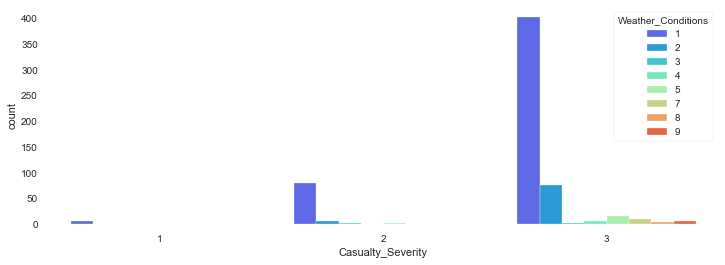

In [234]:
import seaborn as sns

plt.figure(figsize=(12,4))
sns.countplot(x='Casualty_Severity',data=train,hue='Weather_Conditions',palette='rainbow')

In [235]:
train.Casualty_Severity.value_counts()

3    524
2     93
1      6
Name: Casualty_Severity, dtype: int64

- #### Accidents usually take place in the afternoon: refer fig: Weather vs Hour_of_Accident
- #### Accidents with Slight severity occured the most
- #### Accidents ususally took place when the Weather conditions were fine and also there were'nt any high winds : meaning which the weather conditions didn't effectively contribute to occurences of accidents.

- ### Are certain car models safer than others?

In [238]:
train.isnull().sum()

Number_of_Vehicles     0
Road_Class             0
Road_Class_No          0
Road_Surface           0
Lighting_Conditions    0
Weather_Conditions     0
Casualty_Severity      0
Sex_of_Casualty        0
Age_of_Casualty        0
Type_of_Vehicle        0
Time                   0
dtype: int64

In [237]:
train.dropna(inplace = True)

In [239]:
# Unique values for all the columns
for col in train.columns[~(train.columns.isin(['Age_of_Casualty','Time_Of_Day ']))].tolist():
    print(" Unique Values --> " + col, ':', len(train[col].unique()), ': ', train[col].unique())

 Unique Values --> Number_of_Vehicles : 7 :  [1 2 3 4 5 7 6]
 Unique Values --> Road_Class : 4 :  [6 3 1 4]
 Unique Values --> Road_Class_No : 24 :  ['U' 'A646' 'A6025' 'A644' 'A58' 'M62' 'B6113' 'A629' 'A6139' 'A643'
 'A6033' 'B6114' 'A6036' 'A6026' 'A647' 'A681' 'A641' 'A6107' 'B6138'
 'B6112' 'A649' 'A672' 'B6147' 'A62']
 Unique Values --> Road_Surface : 5 :  [2 1 4 5 3]
 Unique Values --> Lighting_Conditions : 5 :  [1 4 6 7 5]
 Unique Values --> Weather_Conditions : 8 :  [9 1 8 2 4 3 5 7]
 Unique Values --> Casualty_Severity : 3 :  [3 2 1]
 Unique Values --> Sex_of_Casualty : 2 :  [2 1]
 Unique Values --> Type_of_Vehicle : 12 :  [ 9 19  8  1 11  5  3  2 20 90 21  4]
 Unique Values --> Time : 6 :  ['Morning' 'Evening' 'Night' 'Late Night' 'Afternoon' 'Early Morning']


map_vehicle_type={1:'Pedal cycle',
2:'Motorcycle 50cc and under',
3:'Motorcycle 125cc and under',
4:'Motorcycle over 125cc and up to 500cc',
5:'Motorcycle over 500cc',
8:'Taxi/Private hire car',
9:'Car',
10:'Minibus (8 - 16 passenger seats)',
11:'Bus or coach (17 or more pass seats)',
16:'Ridden horse',
17:'Agricultural vehicle',
18:'Tram',
19:'Van / Goods 3.5 tonnes mgw or under',
20:'Goods over 3.5t. and under 7.5t',
21:'Goods 7.5 tonnes mgw and over',
22:'Mobility scooter',
23:'Electric motorcycle',
90:'Other vehicle',
97:'Motorcycle - unknown cc',
98:'Goods vehicle - unknown weight'
}
train['Type_of_Vehicle'] = train['Type_of_Vehicle'].map(map_vehicle_type)

In [240]:
train['Number_of_Vehicles'] = train['Number_of_Vehicles'].map({1:1, 2:2, 3:3, 4:4, 5:5, 6:6, 7:7})
train['Road_Class'] = train['Road_Class'].map({1:1, 3:3, 4:4, 6:6})
train['Road_Class_No'] = train['Road_Class_No'].map({'U':1, 'A646':2, 'A6025':3, 'A644':4, 'A58':5, 'M62':6, 
                                                             'B6113':7, 'A629':8, 'A6139':9, 'A643':10, 'A6033':11, 'B6114':12,
                                                             'A6036':13, 'A6026':14, 'A647':15, 'A681':16, 'A641':17,
                                                             'A6107':18, 'B6138':19,'B6112':20, 'A649':21, 'A672':22,
                                                             'B6147':23, 'A62':24})
train['Road_Surface'] = train['Road_Surface'].map({1:1, 2:2, 3:3, 4:4, 5:5})
train['Lighting_Conditions'] = train['Lighting_Conditions'].map({1:1, 4:2, 5:3, 6:4, 7:5})
train['Weather_Conditions'] = train['Weather_Conditions'].map({1:1, 2:2, 3:3, 4:4, 5:5, 7:6,8:7,9:8})
train['Casualty_Severity'] = train['Casualty_Severity'].map({1:1, 2:2, 3:3})
train['Time'] = train['Time'].map({'Morning': 1, 'Evening': 2, 'Night':3, 'Late Night':4, 'Afternoon':5, 'Early Morning':6 })

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '8'),
  Text(6, 0, '9'),
  Text(7, 0, '11'),
  Text(8, 0, '19'),
  Text(9, 0, '20'),
  Text(10, 0, '21'),
  Text(11, 0, '90')])

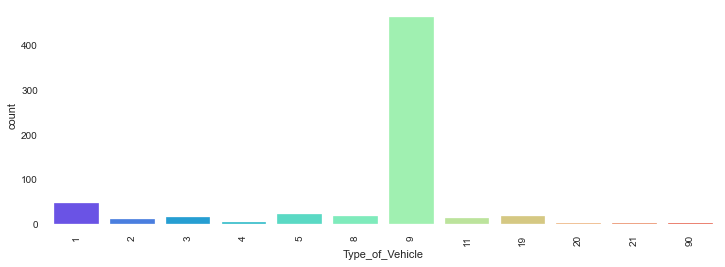

In [241]:
plt.figure(figsize=(12,4))
sns.countplot('Type_of_Vehicle',data=train, palette='rainbow')
plt.xticks(rotation=90)

### Number of accidents taking place with other vehciles are almost negligible as comapred to those with Cars.

In [242]:
train1 = train.dtypes.reset_index()
train1.columns = ["Count", "Column Type"]
train1

Count Column Type
0    Number_of_Vehicles       int64
1            Road_Class       int64
2         Road_Class_No       int64
3          Road_Surface       int64
4   Lighting_Conditions       int64
5    Weather_Conditions       int64
6     Casualty_Severity       int64
7       Sex_of_Casualty       int64
8       Age_of_Casualty       int64
9       Type_of_Vehicle       int64
10                 Time       int64

In [243]:
train1.groupby("Column Type").aggregate('count').reset_index()

Column Type  Count
0       int64     11

In [244]:
train.columns

Index(['Number_of_Vehicles', 'Road_Class', 'Road_Class_No', 'Road_Surface',
       'Lighting_Conditions', 'Weather_Conditions', 'Casualty_Severity',
       'Sex_of_Casualty', 'Age_of_Casualty', 'Type_of_Vehicle', 'Time'],
      dtype='object')

In [245]:
train['Number_of_Vehicles'] = train['Number_of_Vehicles'].astype('category')
train['Road_Class'] = train['Road_Class'].astype('category')
train['Road_Surface'] = train['Road_Surface'].astype('category')
train['Road_Class_No'] = train['Road_Class_No'].astype('category')
train['Lighting_Conditions'] = train['Lighting_Conditions'].astype('category')
train['Weather_Conditions'] = train['Weather_Conditions'].astype('category')
train['Sex_of_Casualty'] = train['Sex_of_Casualty'].astype('category')
train['Type_of_Vehicle'] = train['Type_of_Vehicle'].astype('category')
train['Casualty_Severity'] = train['Casualty_Severity'].astype('category')
train['Time'] = train['Time'].astype('category')


In [246]:
train2 = train.dtypes.reset_index()
train2.columns = ["Count", "Column Type"]
train2

Count Column Type
0    Number_of_Vehicles    category
1            Road_Class    category
2         Road_Class_No    category
3          Road_Surface    category
4   Lighting_Conditions    category
5    Weather_Conditions    category
6     Casualty_Severity    category
7       Sex_of_Casualty    category
8       Age_of_Casualty       int64
9       Type_of_Vehicle    category
10                 Time    category

In [227]:
corr_matrix = train.corr()
corr_matrix["Casualty_Severity"].sort_values(ascending=False)

Casualty_Severity      1.000000
Number_of_Vehicles     0.166101
Road_Surface           0.087646
Weather_Conditions     0.079292
Type_of_Vehicle        0.076430
Sex_of_Casualty        0.061751
Road_Class            -0.002610
Age_of_Casualty       -0.057684
Lighting_Conditions   -0.134530
Name: Casualty_Severity, dtype: float64

In [247]:
train.head()

Number_of_Vehicles Road_Class Road_Class_No Road_Surface  \
0                  1          6             1            2   
1                  1          6             1            2   
2                  1          6             1            2   
3                  2          6             1            2   
4                  2          6             1            2   

  Lighting_Conditions Weather_Conditions Casualty_Severity Sex_of_Casualty  \
0                   1                  8                 3               2   
1                   2                  1                 3               2   
2                   2                  1                 3               1   
3                   1                  7                 3               2   
4                   1                  7                 3               1   

   Age_of_Casualty Type_of_Vehicle Time  
0                8               9    1  
1               15               9    2  
2               17               9    2  
3               29               9    1  
4                9               9    1

In [248]:
train.dtypes

Number_of_Vehicles     category
Road_Class             category
Road_Class_No          category
Road_Surface           category
Lighting_Conditions    category
Weather_Conditions     category
Casualty_Severity      category
Sex_of_Casualty        category
Age_of_Casualty           int64
Type_of_Vehicle        category
Time                   category
dtype: object

In [249]:
# Unique values for all the columns
for col in train.columns[~(train.columns.isin(['Age_of_Casualty','Time_Of_Day ']))].tolist():
    print(" Unique Values --> " + col, ':', len(train[col].unique()), ': ', train[col].unique())

 Unique Values --> Number_of_Vehicles : 7 :  [1, 2, 3, 4, 5, 7, 6]
Categories (7, int64): [1, 2, 3, 4, 5, 7, 6]
 Unique Values --> Road_Class : 4 :  [6, 3, 1, 4]
Categories (4, int64): [6, 3, 1, 4]
 Unique Values --> Road_Class_No : 24 :  [1, 2, 3, 4, 5, ..., 20, 21, 22, 23, 24]
Length: 24
Categories (24, int64): [1, 2, 3, 4, ..., 21, 22, 23, 24]
 Unique Values --> Road_Surface : 5 :  [2, 1, 4, 5, 3]
Categories (5, int64): [2, 1, 4, 5, 3]
 Unique Values --> Lighting_Conditions : 5 :  [1, 2, 4, 5, 3]
Categories (5, int64): [1, 2, 4, 5, 3]
 Unique Values --> Weather_Conditions : 8 :  [8, 1, 7, 2, 4, 3, 5, 6]
Categories (8, int64): [8, 1, 7, 2, 4, 3, 5, 6]
 Unique Values --> Casualty_Severity : 3 :  [3, 2, 1]
Categories (3, int64): [3, 2, 1]
 Unique Values --> Sex_of_Casualty : 2 :  [2, 1]
Categories (2, int64): [2, 1]
 Unique Values --> Type_of_Vehicle : 12 :  [9, 19, 8, 1, 11, ..., 2, 20, 90, 21, 4]
Length: 12
Categories (12, int64): [9, 19, 8, 1, ..., 20, 90, 21, 4]
 Unique Values --> 

In [233]:
train.dtypes

Number_of_Vehicles     category
Road_Class             category
Road_Class_No          category
Road_Surface           category
Lighting_Conditions    category
Weather_Conditions     category
Casualty_Severity         int64
Sex_of_Casualty        category
Age_of_Casualty           int64
Type_of_Vehicle        category
dtype: object

train1 = pd.get_dummies(train, drop_first = True)
train1.head()

In [250]:
print(train.columns)

Index(['Number_of_Vehicles', 'Road_Class', 'Road_Class_No', 'Road_Surface',
       'Lighting_Conditions', 'Weather_Conditions', 'Casualty_Severity',
       'Sex_of_Casualty', 'Age_of_Casualty', 'Type_of_Vehicle', 'Time'],
      dtype='object')


<AxesSubplot:>

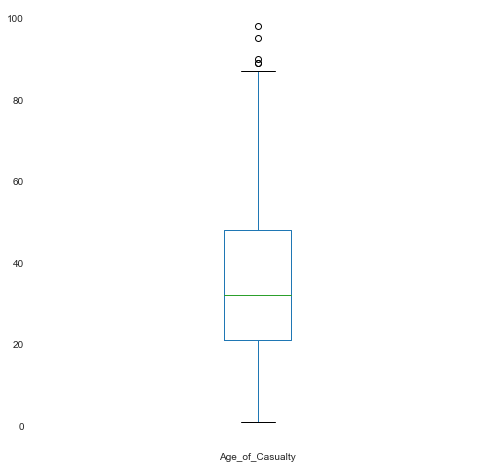

In [251]:
train['Age_of_Casualty'].plot(kind = 'box',figsize = (8,8))

In [252]:
X = train.drop("Casualty_Severity", axis = 1)
X.head()

Number_of_Vehicles Road_Class Road_Class_No Road_Surface  \
0                  1          6             1            2   
1                  1          6             1            2   
2                  1          6             1            2   
3                  2          6             1            2   
4                  2          6             1            2   

  Lighting_Conditions Weather_Conditions Sex_of_Casualty  Age_of_Casualty  \
0                   1                  8               2                8   
1                   2                  1               2               15   
2                   2                  1               1               17   
3                   1                  7               2               29   
4                   1                  7               1                9   

  Type_of_Vehicle Time  
0               9    1  
1               9    2  
2               9    2  
3               9    1  
4               9    1

In [253]:
y = train[['Casualty_Severity']]
y.head()
y.value_counts()

Casualty_Severity
3                    523
2                     92
1                      6
dtype: int64

In [259]:
X_train.head()
#y_train.value_counts()

Number_of_Vehicles Road_Class Road_Class_No Road_Surface  \
253                  4          6             1            2   
233                  3          3             5            1   
113                  1          3            10            2   
219                  2          4             7            2   
108                  2          3            14            5   

    Lighting_Conditions Weather_Conditions Sex_of_Casualty  Age_of_Casualty  \
253                   2                  1               1               33   
233                   1                  1               2               53   
113                   1                  1               1               50   
219                   1                  2               2               45   
108                   1                  2               1               23   

    Type_of_Vehicle Time  
253               9    3  
233               9    2  
113               9    1  
219               9    1  
108               9    6

In [254]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=2018)

In [261]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(k_neighbors=2)
X_train_smt, y_train_smt = smt.fit_sample(X_train, y_train)
y_train_smt.value_counts()

Casualty_Severity
3                    363
2                    363
1                    363
dtype: int64

In [ ]:
oversampler=SMOTE(kind='regular',k_neighbors=2)

In [268]:
from sklearn.ensemble import RandomForestClassifier    # Random Forest

random_forest1 = RandomForestClassifier(n_estimators=100)
random_forest1.fit(X_train_smt, y_train_smt)
y_pred = random_forest1.predict(X_train)


from sklearn.metrics import confusion_matrix , accuracy_score , classification_report
c_m = confusion_matrix(y_train , y_pred)
c_r = classification_report(y_train , y_pred)
a_c = accuracy_score(y_train , y_pred)

print(c_m)
print(c_r)
print(a_c)
#print(y_pred)

C:\Users\Akshay\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


[[  5   0   0]
 [  0  65   1]
 [  1   2 360]]
              precision    recall  f1-score   support

           1       0.83      1.00      0.91         5
           2       0.97      0.98      0.98        66
           3       1.00      0.99      0.99       363

    accuracy                           0.99       434
   macro avg       0.93      0.99      0.96       434
weighted avg       0.99      0.99      0.99       434

0.9907834101382489


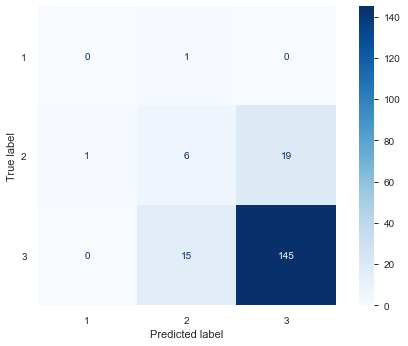

In [269]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(random_forest1, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

No handles with labels found to put in legend.


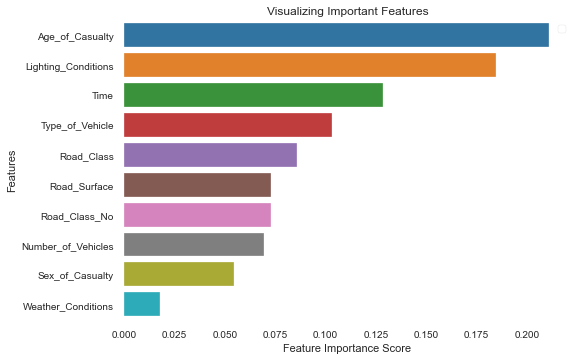

In [270]:
feature_imp = pd.Series(random_forest1.feature_importances_,index=X.columns).sort_values(ascending=False)

# Creating a bar plot, displaying only the top k features
k=10
sns.barplot(x=feature_imp[:10], y=feature_imp.index[:k])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [264]:
import joblib
joblib.dump(random_forest1, 'rf_accident1.pkl')

['rf_accident1.pkl']

In [265]:
import pickle
pickle_out = open('rf_accident1.pkl', 'wb')
pickle.dump(random_forest1,pickle_out)
pickle_out.close()

In [34]:
# ensemble techniques

from imblearn.ensemble import EasyEnsembleClassifier
easy = EasyEnsembleClassifier()
easy.fit(X_train_smt, y_train_smt)
y_pred = easy.predict(X_train)


c:\users\akshay\.conda\envs\app_gui\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [25]:
X_train.shape
y_train.shape
X_test.shape
print(y_test.shape)
print(y_pred.shape)

(187, 1)
(436,)


In [35]:
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report
c_m = confusion_matrix(y_train , y_pred)
c_r = classification_report(y_train , y_pred)
a_c = accuracy_score(y_train , y_pred)

print(c_m)
print(c_r)
print(a_c)

[[  3   0   3]
 [  1  35  29]
 [  2 140 223]]
              precision    recall  f1-score   support

           1       0.50      0.50      0.50         6
           2       0.20      0.54      0.29        65
           3       0.87      0.61      0.72       365

    accuracy                           0.60       436
   macro avg       0.52      0.55      0.50       436
weighted avg       0.77      0.60      0.65       436

0.5986238532110092


In [36]:
# easy
import joblib 
joblib.dump(easy, 'easy1.pkl')

['easy1.pkl']

In [37]:
import pickle
pickle_out = open('easy1.pkl','wb')
pickle.dump(easy, pickle_out)
pickle_out.close()

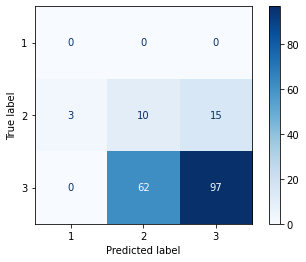

In [38]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(easy, X_test, y_test,cmap=plt.cm.Blues)
plt.show()

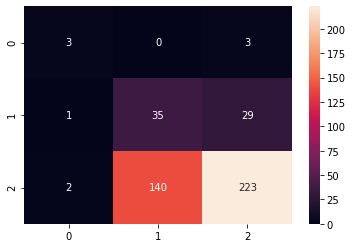

In [39]:
sns.heatmap(c_m,annot=True,fmt="d") 
plt.show()

No handles with labels found to put in legend.


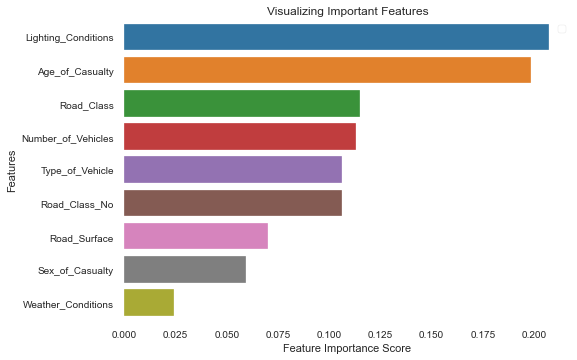

In [266]:
feature_imp = pd.Series(random_forest.feature_importances_,index=X.columns).sort_values(ascending=False)

# Creating a bar plot, displaying only the top k features
k=10
sns.barplot(x=feature_imp[:10], y=feature_imp.index[:k])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [136]:
y_pred

array([2, 2, 1, 3, 1, 2, 3, 3, 3, 3, 3, 3, 2, 3, 1, 3, 2, 3, 2, 2, 3, 3,
       3, 2, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 1, 2, 2, 3, 2, 2, 3, 2, 3, 3,
       1, 2, 2, 2, 2, 2, 3, 3, 3, 2, 3, 1, 3, 2, 2, 3, 1, 2, 3, 2, 3, 2,
       3, 3, 1, 3, 3, 3, 3, 3, 1, 2, 3, 1, 2, 1, 3, 3, 2, 2, 3, 2, 2, 1,
       2, 3, 2, 3, 2, 2, 1, 2, 3, 2, 2, 3, 3, 3, 2, 1, 3, 2, 2, 3, 3, 2,
       1, 2, 2, 1, 1, 3, 2, 3, 2, 3, 1, 3, 1, 3, 3, 2, 3, 3, 1, 3, 3, 3,
       2, 3, 1, 2, 1, 1, 2, 2, 2, 1, 2, 3, 2, 1, 2, 3, 2, 2, 3, 3, 2, 3,
       3, 3, 1, 3, 1, 1, 3, 1, 3, 3, 3, 2, 2, 3, 2, 3, 2, 1, 2, 2, 3, 3,
       3, 2, 3, 3, 1, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 2, 2, 3, 2, 1, 2, 3,
       2, 2, 3, 2, 1, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3, 3, 3, 2, 3, 2, 3, 3,
       3, 2, 3, 1, 2, 1, 3, 1, 3, 1, 2, 1, 3, 2, 2, 3, 1, 1, 3, 2, 3, 2,
       2, 1, 1, 2, 2, 3, 3, 3, 2, 3, 1, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 2,
       3, 3, 2, 3, 1, 3, 2, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3,
       2, 3, 1, 2, 2, 2, 2, 2, 1, 3, 3, 2, 3, 3, 1,

In [45]:
### Gradient Boosting Regressor :

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


params = {'n_estimators': 570,
          'max_depth':3,
          'min_samples_split': 7,
          'learning_rate': 0.008,
          'loss': 'ls'}

In [42]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import math
from sklearn import datasets, ensemble
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state=0)
gbc.fit(X_train, y_train)
y_pred1 = gbc.predict(X_test)
mse = mean_squared_error(y_test, y_pred1)
r2 = r2_score(y_test,y_pred1)


rmse = math.sqrt(mse)

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print("The root mean squared error (MSE) on test set: {:.4f}".format(rmse))
print("R2 Score : {:.4f}".format(r2))

c:\users\akshay\.conda\envs\app_gui\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


The mean squared error (MSE) on test set: 0.1765
The root mean squared error (MSE) on test set: 0.4201
R2 Score : -0.3861


In [43]:
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report
c_m = confusion_matrix(y_test , y_pred1)
c_r = classification_report(y_test , y_pred1)
a_c = accuracy_score(y_test , y_pred1)

print(c_m)
print(c_r)
print(a_c)

[[  0   0   0]
 [  2   1  25]
 [  0   6 153]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.14      0.04      0.06        28
           3       0.86      0.96      0.91       159

    accuracy                           0.82       187
   macro avg       0.33      0.33      0.32       187
weighted avg       0.75      0.82      0.78       187

0.8235294117647058


c:\users\akshay\.conda\envs\app_gui\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


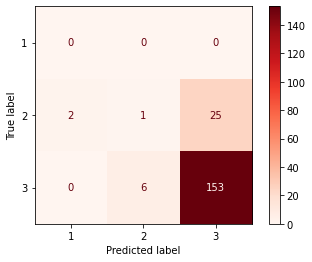

In [46]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(gbc, X_test, y_test,cmap=plt.cm.Reds)
plt.show()

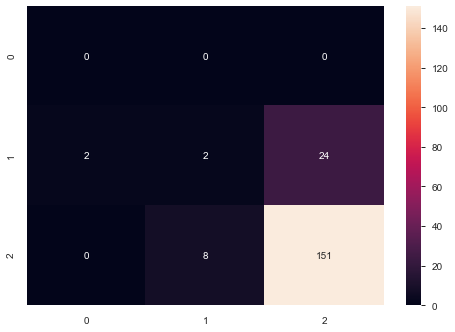

In [59]:
sns.heatmap(c_m,annot=True,fmt="d") 
plt.show()

In [47]:
X_train.columns
#, X_test, y_train, y_test

Index(['Age_of_Casualty', 'Number_of_ Vehicles_2', 'Number_of_ Vehicles_3',
       'Number_of_ Vehicles_4', 'Number_of_ Vehicles_5',
       'Number_of_ Vehicles_6', 'Number_of_ Vehicles_7', '1st_Road_Class_3',
       '1st_Road_Class_4', '1st_Road_Class_6', '1st_Road_Class&No_2',
       '1st_Road_Class&No_3', '1st_Road_Class&No_4', '1st_Road_Class&No_5',
       '1st_Road_Class&No_6', '1st_Road_Class&No_7', '1st_Road_Class&No_8',
       '1st_Road_Class&No_9', '1st_Road_Class&No_10', '1st_Road_Class&No_11',
       '1st_Road_Class&No_12', '1st_Road_Class&No_13', '1st_Road_Class&No_14',
       '1st_Road_Class&No_15', '1st_Road_Class&No_16', '1st_Road_Class&No_17',
       '1st_Road_Class&No_18', '1st_Road_Class&No_19', '1st_Road_Class&No_20',
       '1st_Road_Class&No_21', '1st_Road_Class&No_22', '1st_Road_Class&No_23',
       '1st_Road_Class&No_24', 'Road_Surface_2', 'Road_Surface_3',
       'Road_Surface_4', 'Road_Surface_5', 'Lighting_Conditions_2',
       'Lighting_Conditions_3', 'Lighti

#### 'Number_of_ Vehicles_2', 'Number_of_ Vehicles_3','Number_of_ Vehicles_4', 'Number_of_ Vehicles_5','Number_of_ Vehicles_6', 'Number_of_ Vehicles_7'
#### '1st_Road_Class_3','1st_Road_Class_4', '1st_Road_Class_6'
#### '1st_Road_Class&No_A6025','1st_Road_Class&No_A6026', '1st_Road_Class&No_A6033','1st_Road_Class&No_A6036', '1st_Road_Class&No_A6107','1st_Road_Class&No_A6139', '1st_Road_Class&No_A62','1st_Road_Class&No_A629', '1st_Road_Class&No_A641','1st_Road_Class&No_A643', '1st_Road_Class&No_A644','1st_Road_Class&No_A646', '1st_Road_Class&No_A647','1st_Road_Class&No_A649', '1st_Road_Class&No_A672','1st_Road_Class&No_A681', '1st_Road_Class&No_B6112','1st_Road_Class&No_B6113', '1st_Road_Class&No_B6114','1st_Road_Class&No_B6138', '1st_Road_Class&No_B6147','1st_Road_Class&No_M62', '1st_Road_Class&No_U'
#### 'Road_Surface_2', 'Road_Surface_3', 'Road_Surface_4', 'Road_Surface_5'
#### 'Lighting_Conditions_4', 'Lighting_Conditions_5','Lighting_Conditions_6', 'Lighting_Conditions_7'
#### 'Weather_Conditions_2', 'Weather_Conditions_3', 'Weather_Conditions_4','Weather_Conditions_5', 'Weather_Conditions_7', 'Weather_Conditions_8','Weather_Conditions_9'
#### 'Sex_of_Casualty_2'
#### 'Type_of_Vehicle_2','Type_of_Vehicle_3', 'Type_of_Vehicle_4', 'Type_of_Vehicle_5','Type_of_Vehicle_8', 'Type_of_Vehicle_9', 'Type_of_Vehicle_11','Type_of_Vehicle_19', 'Type_of_Vehicle_20', 'Type_of_Vehicle_21','Type_of_Vehicle_90'

In [48]:
from tkinter import*
from PIL import ImageTk, Image

In [81]:
root=Tk()

root.geometry("800x700")

root.configure(background="light blue")
def easy1(battery_power,int_memory,mobile_wt,px_height,px_width,ram):
    loaded_model = pickle.load(open("price_range.pickle", "rb"))
    y_pred = loaded_model.predict([[battery_power,int_memory,mobile_wt,px_height,px_width,ram]])  #order important
    if y_pred == [0]:
        notif1.configure(text="The mobile price belongs to the low level range")
    elif y_pred == [1]:
        notif1.configure(text="The mobile price belongs to the mid level range")
    elif y_pred == [2]:
        notif1.configure(text="The mobile price belongs to the high level range")
    else:
        notif1.configure(text="The mobile price belongs to the premium level range")

#Exit App
def exit_app():
    root.destroy()
        
Head1 = Label(root, text="AIS Solutions PVT LTD", font=('Trebuchet MS',30,"bold","underline")).pack(pady = (10,0))

Head2 = Label(root,text="Mobile Price Range Prediction",font=('Helvetica',25,'bold'),relief="solid").pack(pady=(30,0))    

Number_of_Vehicles=Label(root,text="Number_of_Vehicles",bg="white",relief="solid",width=30).place(x=40,y=300)
Number_of_Vehicles_input=Entry(root,bd=1,width="30",font=("Arial sans MS",14))
Number_of_Vehicles_input.place(x=440,y=300)

int_memory=Label(root,text="Internal Memory (1-64 GB)",font=('Helvetica',10,'bold'),bg="white",relief="solid",width=30).place(x=40,y=350)
int_memory_input=Entry(root,bd=1,width="30",font=("Arial sans MS",14))
int_memory_input.place(x=440,y=350)

mobile_wt=Label(root,text="Mobile Weight (50-250 gm)",font=('Helvetica',10,'bold'),bg="white",relief="solid",width=30).place(x=40,y=400)
mobile_wt_input=Entry(root,bd=1,width="30",font=("Arial sans MS",14))
mobile_wt_input.place(x=440,y=400)

px_height=Label(root,text="Pixel Height (10-2000)",font=('Helvetica',10,'bold'),bg="white",relief="solid",width=30).place(x=40,y=440)
px_height_input=Entry(root,bd=1,width="30",font=("Arial sans MS",14))
px_height_input.place(x=440,y=450)

px_width=Label(root,text="Pixel Width (10-2000)",font=('Helvetica',10,'bold'),bg="white",relief="solid",width=30).place(x=40,y=480)
px_width_input=Entry(root,bd=1,width="30",font=("Arial sans MS",14))
px_width_input.place(x=440,y=500)

ram=Label(root,text="RAM (200-4000 MB)",font=('Helvetica',10,'bold'),bg="white",relief="solid",width=30).place(x=40,y=520)
ram_input=Entry(root,bd=1,width="30",font=("Arial sans MS",14))
ram_input.place(x=440,y=650)


but1 = Button(root,text="Predict the price range",width="50", height="2",command=lambda: gbimodel(battery_power_input.get(),int_memory_input.get(),
                                                                                                  mobile_wt_input.get(),px_height_input.get(),
                                                                                                  px_width_input.get(),ram_input.get()))

button_exit = Button(root, text = "Exit", width="15", height="1", command = exit_app) 

notif1 = Label(root, text="",font=("Arial sans MS",14,"bold"))

but1.place(x=200,y=600)

button_exit.pack(pady=(580,0))

notif1.place(x=150,y=350)
root.resizable(0,0)
root.mainloop()

NameError: name 'Tk' is not defined

In [49]:
# Unique values for all the columns
for col in train.columns[~(train.columns.isin(['Age_of_Casualty']))].tolist():
    print(" Unique Values --> " + col, ':', len(train[col].unique()), ': ', train[col].unique())

 Unique Values --> Number_of_ Vehicles : 7 :  [1, 2, 3, 4, 5, 7, 6]
Categories (7, int64): [1, 2, 3, 4, 5, 7, 6]
 Unique Values --> 1st_Road_Class : 4 :  [6, 3, 1, 4]
Categories (4, int64): [6, 3, 1, 4]
 Unique Values --> 1st_Road_Class&No : 24 :  [1, 2, 3, 4, 5, ..., 20, 21, 22, 23, 24]
Length: 24
Categories (24, int64): [1, 2, 3, 4, ..., 21, 22, 23, 24]
 Unique Values --> Road_Surface : 5 :  [2, 1, 4, 5, 3]
Categories (5, int64): [2, 1, 4, 5, 3]
 Unique Values --> Lighting_Conditions : 5 :  [1, 2, 4, 5, 3]
Categories (5, int64): [1, 2, 4, 5, 3]
 Unique Values --> Weather_Conditions : 8 :  [8, 1, 7, 2, 4, 3, 5, 6]
Categories (8, int64): [8, 1, 7, 2, 4, 3, 5, 6]
 Unique Values --> Casualty_Severity : 3 :  [3 2 1]
 Unique Values --> Sex_of_Casualty : 2 :  [2, 1]
Categories (2, int64): [2, 1]
 Unique Values --> Type_of_Vehicle : 12 :  [1, 2, 3, 4, 5, ..., 8, 9, 10, 11, 12]
Length: 12
Categories (12, int64): [1, 2, 3, 4, ..., 9, 10, 11, 12]



Information on all road accident casualties across Calderdale. Data includes location, number of people and vehicles involved, road surface, weather conditions and severity of any casualties. Please note ----------- * The Eastings and Northings are generated at the roadside where the accident occurred. Sometimes due to poor internet connectivity this data is may not be as accurate as it could be. A useful tool to analyse the data is Excel pivot tables, these help summarise large amounts of data in a easy to view table. The road casualty pdf reports refer to casualties who were killed or seriously injured, whereas the accident data refers to all road casualties.
1st Road Class	1st Road Class Desc
- 1	Motorway
- 2	A(M)
- 3	A
- 4	B
- 5	C
- 6	Unclassified
	
> - Road Surface	Road Surface Desc
- 1	Dry
- 2	Wet / Damp
- 3	Snow
- 4	Frost / Ice
- 5	Flood (surface water over 3cm deep)
	
> - Lighting Conditions	Lighting Conditions Desc
- 1	Daylight: street lights present
- 2	Daylight: no street lighting
- 3	Daylight: street lighting unknown
- 4	Darkness: street lights present and lit
- 5	Darkness: street lights present but unlit
- 6	Darkness: no street lighting
- 7	Darkness: street lighting unknown
	
> - Weather Conditions	Weather Conditions Desc
- 1	Fine without high winds
- 2	Raining without high winds
- 3	Snowing without high winds
- 4	Fine with high winds
- 5	Raining with high winds
- 6	Snowing with high winds
- 7	Fog or mist – if hazard
- 8	Other
- 9	Unknown
	
> - Casualty Class	Casualty Class Desc
- 1	Driver or rider
- 2	Vehicle or pillion passenger
- 3	Pedestrian
	
> - Casualty Severity	Casualty Severity Desc
- 1	Fatal
- 2	Serious
- 3	Slight
	
> - Sex of Casualty	Sex of Casualty Desc
- 1	Male
- 2	Female
	
> - Age of Casualty
- [Age given in years]
	
> - Type of Vehicle	Type of Vehicle Desc
- 1	Pedal cycle
- 2	M/cycle 50cc and under
- 3	Motorcycle over 50cc and up to 125cc
- 4	Motorcycle over 125cc and up to 500cc
- 5	Motorcycle over 500cc
- 6	[Not used]
- 7	[Not used]
- 8	Taxi/Private hire car
- 9	Car
- 10	Minibus (8 – 16 passenger seats)
- 11	Bus or coach (17 or more passenger seats)
- 12	[Not used]
- 13	[Not used]
- 14	Other motor vehicle
- 15	Other non-motor vehicle
- 16	Ridden horse
- 17	Agricultural vehicle (includes diggers etc.)
- 18	Tram / Light rail
- 19	Goods vehicle 3.5 tonnes mgw and under
- 20	Goods vehicle over 3.5 tonnes and under 7.5 tonnes mgw
- 21	Goods vehicle 7.5 tonnes mgw and over
- 22	Mobility Scooter
- 90	Other Vehicle 
- 97	Motorcycle - Unknown CC



Number_of_ Vehicles     7
1st_Road_Class          4
1st_Road_Class&No      24
Road_Surface            5
Lighting_Conditions     5
Weather_Conditions      8
Casualty_Severity       3
Sex_of_Casualty         2
Age_of_Casualty        88
Type_of_Vehicle        12



Type of Vehicle 
1 Pedal cycle
2 M/cycle 50cc and under
3 Motorcycle over 50cc and up to 125cc
4 Motorcycle over 125cc and up to 500cc
5 Motorcycle over 500cc
6 [Not used]
7 [Not used]
8 Taxi/Private hire car
9 Car
10 Minibus (8 – 16 passenger seats)
11 Bus or coach (17 or more passenger seats)
12 [Not used]
13 [Not used]
14 Other motor vehicle
15 Other non-motor vehicle
16 Ridden horse
17 Agricultural vehicle (includes diggers etc.)
18 Tram / Light rail
19 Goods vehicle 3.5 tonnes mgw and under
20 Goods vehicle over 3.5 tonnes and under 7.5 tonnes mgw
21 Goods vehicle 7.5 tonnes mgw and over
22 Mobility Scooter
90 Other Vehicle
97 Motorcycle - Unknown CC

In [294]:
X_train_smt.head()
#y_train_smt
from sqlalchemy import Table, Column, Float

In [295]:
#from tkinter import * 
import tkinter as tk
from tkinter.ttk import *

# Creating master Tkinter window 
master = Tk() 
master.geometry("1000x800")
#master.configure(background="lightblue") #color of window

def model(Number_of_Vehicles, Road_Class, Road_Class_No, Road_Surface, Lighting_Conditions, Weather_Conditions, 
          Sex_of_Casualty, Age_of_Casualty, Type_of_Vehicle):
    loaded_model = pickle.load(open("rf_accident.pkl", "rb"))
    prediction = loaded_model.predict([[Number_of_Vehicles, Road_Class, Road_Class_No, Road_Surface, 
                                        Lighting_Conditions, Weather_Conditions,
                                        Sex_of_Casualty , Age_of_Casualty , Type_of_Vehicle]])  #order important
    if prediction == [1]:
        notif1.configure(text="You are Fatal") 
    elif prediction == [2]:
        notif1.configure(text="You are an Serious")
    elif prediction == [3]:
        notif1.configure(text="You are Slight") 
        
Head1 = Label(master, text="AIS Solutions PVT LTD", font=('Trebuchet MS',30,"bold","underline")).place(x = 30 , y = 10)

Head2 = Label(master,text="Road Accident",font=('Helvetica',25,'bold'),relief="solid").place(x = 500 , y = 10)   

## Number_of_Vehicles 

def var1():
    v11 = print(v1.get())
tk.Label(master, text="""Number_of_Vehicles :""",justify = tk.LEFT,padx = 20, font=('Trebuchet MS',12,"bold","underline")).place(x = 20 , y = 280)
# Tkinter string variable 
# able to store any string value 
v1 = StringVar(master, name ="str")

n1 = Radiobutton(master, text = "1", variable = v, value = 1, command = var1).place(x = 220 , y = 100)
n2 = Radiobutton(master, text = "2", variable = v, value = 2, command = var1).place(x = 320 , y = 100)
n3 = Radiobutton(master, text = "3", variable = v, value = 3, command = var1).place(x = 400 , y = 100)
n4 = Radiobutton(master, text = "4", variable = v, value = 4, command = var1).place(x = 480 , y = 100)
n5 = Radiobutton(master, text = "5", variable = v, value = 5, command = var1).place(x = 560 , y = 100)
n6 = Radiobutton(master, text = "6", variable = v, value = 6, command = var1).place(x = 640 , y = 100)
n7 = Radiobutton(master, text = "7", variable = v, value = 7, command = var1).place(x = 720 , y = 100)

## Road_Class

def var2():
    v22 = print(v2.get())
tk.Label(master, text="""Road_Class :""",justify = tk.LEFT,padx = 20, font=('Trebuchet MS',12,"bold","underline")).place(x = 20 , y = 100)
# Tkinter string variable 
# able to store any string value 
v2 = StringVar(master, name ="str")

Motorway = Radiobutton(master, text = "Motorway", variable = v, value = 1, command = var2).place(x = 220 , y = 130)
AM = Radiobutton(master, text = "A(M)", variable = v, value = 2, command = var2).place(x = 320 , y = 130)
A = Radiobutton(master, text = "A", variable = v, value = 3, command = var2).place(x = 400 , y = 130)
B = Radiobutton(master, text = "B", variable = v, value = 4, command = var2).place(x = 480 , y = 130)
C = Radiobutton(master, text = "C", variable = v, value = 5, command = var2).place(x = 580 , y = 130)
Unclassified = Radiobutton(master, text = "Unclassified", variable = v, value = 6, command = var2).place(x = 550 , y = 130)

### Road_Surface

def var3():
    v33 = print(v3.get())
    
tk.Label(master, text="""Road_Surface :""",justify = tk.LEFT,padx = 20, font=('Trebuchet MS',12,"bold","underline")).place(x = 20 , y = 160)
# Tkinter string variable 
# able to store any string value 
v3 = StringVar(master, name ="str")

Dry = Radiobutton(master, text = "Dry", variable = v, value = 1, command = var3).place(x = 220 , y = 160)
Wet = Radiobutton(master, text = "Wet / Damp", variable = v, value = 2, command = var3).place(x = 320 , y = 160)
Snow = Radiobutton(master, text = "Snow", variable = v, value = 3, command = var3).place(x = 400 , y = 160)
Frost = Radiobutton(master, text = "Frost / Ice", variable = v, value = 4, command = var3).place(x = 480 , y = 160)
Flood = Radiobutton(master, text = "Flood", variable = v, value = 5, command = var3).place(x = 560 , y = 160)

## Lighting_Conditions 

def var4():
    v44 = print(v4.get())
    
tk.Label(master, text="""Lighting_Conditions :""",justify = tk.LEFT,padx = 20, font=('Trebuchet MS',12,"bold","underline")).place(x = 20 , y = 190)
# Tkinter string variable 
# able to store any string value 
v4 = StringVar(master, name ="str")

Daylight1 = Radiobutton(master, text = "Daylight: street lights present", variable = v, value = 1,command = var4).place(x = 220 , y = 190)
Daylight2 = Radiobutton(master, text = "Daylight: no street lighting", variable = v, value = 2,command = var4).place(x = 440 , y = 190)
Daylight3 = Radiobutton(master, text = "Daylight: street lighting unknown", variable = v, value = 3,command = var4).place(x = 660 , y = 190)
Daylight4 = Radiobutton(master, text = "Darkness: street lights present and lit", variable = v, value = 4,command = var4).place(x = 220 , y = 220)
Daylight5 = Radiobutton(master, text = "Darkness: street lights present but unlit", variable = v, value = 5,command = var4).place(x = 460 , y = 220)
Daylight6 = Radiobutton(master, text = "Darkness: no street lighting", variable = v, value = 6,command = var4).place(x = 710 , y = 220)
Daylight7 = Radiobutton(master, text = "Darkness: street lighting unknown", variable = v, value = 7,command = var4).place(x = 220 , y = 250)

## Weather_Conditions 

def var5():
    v55 = print(v5.get())
    
tk.Label(master, text="""Weather_Conditions :""",justify = tk.LEFT,padx = 20, font=('Trebuchet MS',12,"bold","underline")).place(x = 20 , y = 280)
# Tkinter string variable 
# able to store any string value 
v5 = StringVar(master, name ="str")

Fine = Radiobutton(master, text = "Fine without high winds", variable = v, value = 1, command = var5).place(x = 220 , y = 280)
Raining = Radiobutton(master, text = "Raining without high winds", variable = v, value = 2, command = var5).place(x = 380 , y = 280)
Nowing = Radiobutton(master, text = "Nowing without high winds", variable = v, value = 3, command = var5).place(x = 580 , y = 280)
Fine1 = Radiobutton(master, text = "Fine with high winds", variable = v, value = 4, command = var5).place(x = 760 , y = 280)
Raining1 = Radiobutton(master, text = "Raining with high winds", variable = v, value = 5, command = var5).place(x = 220 , y = 310)
Snowing = Radiobutton(master, text = "Snowing with high winds", variable = v, value = 6, command = var5).place(x = 380 , y = 310)
Fog = Radiobutton(master, text = "Fog or mist – if hazard", variable = v, value = 7, command = var5).place(x = 580 , y = 310)
Other = Radiobutton(master, text = "Other", variable = v, value = 8, command = var5).place(x = 760 , y = 310)

## Sex_of_Casualty 

def var6():
    v66 = print(v6.get())
    
tk.Label(master, text="""Sex_of_Casualty :""",justify = tk.LEFT,padx = 20, font=('Trebuchet MS',12,"bold","underline")).place(x = 20 , y = 340)
# Tkinter string variable 
# able to store any string value 
v6 = StringVar(master, name ="str")

Male = Radiobutton(master, text = "Male", variable = v, value = 1, command = var6).place(x = 220 , y = 340)
Female = Radiobutton(master, text = "Female", variable = v, value = 2, command = var6).place(x = 440 , y = 340)


## Type of Vehicle 

def var7():
    v77 = print(v7.get())
    

tk.Label(master, text="""Type of Vehicle :""",justify = tk.LEFT,padx = 20, font=('Trebuchet MS',12,"bold","underline")).place(x = 20 , y = 370)
# Tkinter string variable 
# able to store any string value 
v7 = StringVar(master, name ="str")

a11 = Radiobutton(master, text = "Pedal cycle", variable = v, value = 1,command = var7).place(x = 220 , y = 370)
a22= Radiobutton(master, text = "M/cycle 50cc and under", variable = v, value =2,command = var7 ).place(x = 320 , y = 370)
a33 = Radiobutton(master, text = "Motorcycle over 50cc and up to 125cc", variable = v, value = 3,command = var7).place(x = 480 , y = 370)
a44 = Radiobutton(master, text = "Motorcycle over 125cc and up to 500cc", variable = v, value = 4,command = var7).place(x = 720 , y = 370)
a55 = Radiobutton(master, text = "Motorcycle over 500cc", variable = v, value = 5,command = var7).place(x = 220 , y = 400)
a66 = Radiobutton(master, text = "Not used 1", variable = v, value = 6,command = var7).place(x = 370 , y = 400)
a77 = Radiobutton(master, text = "Not used 2", variable = v, value = 7,command = var7).place(x = 470 , y = 400)
a88 = Radiobutton(master, text = "Taxi/Private hire car", variable = v, value = 8,command = var7).place(x = 570 , y = 400)
a99 = Radiobutton(master, text = "Car", variable = v, value = 9,command = var7).place(x = 720 , y = 400)
a10 = Radiobutton(master, text = "Minibus (8 – 16 passenger seats)", variable = v, value = 10,command = var7).place(x = 220 , y = 430)
a11 = Radiobutton(master, text = "MBus or coach (17 or more passenger seats)", variable = v, value = 11,command = var7).place(x = 440 , y = 430)
a12 = Radiobutton(master, text = "Not used 3", variable = v, value = 12,command = var7).place(x = 720 , y = 430)
a13 = Radiobutton(master, text = "Not used 4", variable = v, value = 13,command = var7).place(x = 820 , y = 430)
a14 = Radiobutton(master, text = "Other motor vehicle", variable = v, value = 14,command = var7).place(x = 220 , y = 460)
a15 = Radiobutton(master, text = "Other non-motor vehicle", variable = v, value = 15,command = var7).place(x = 370 , y = 460)
a16 = Radiobutton(master, text = "Ridden horse", variable = v, value = 16,command = var7).place(x = 570 , y = 460)
a17 = Radiobutton(master, text = "Agricultural vehicle", variable = v, value = 17,command = var7).place(x = 720 , y = 460)
a19 = Radiobutton(master, text = "Goods vehicle 3.5 tonnes mgw and under", variable = v, value = 19,command = var7).place(x = 430 , y = 490)
a18 = Radiobutton(master, text = "Tram / Light rail", variable = v, value = 18,command = var7).place(x = 680 , y = 490)
a20 = Radiobutton(master, text = "Goods vehicle over 3.5 tonnes and under 7.5 tonnes mgw", variable = v, value = 20,command = var7).place(x = 220 , y = 490)
a21 = Radiobutton(master, text = "Goods vehicle 7.5 tonnes mgw and over", variable = v, value = 21,command = var7).place(x = 580 , y = 490)
a22 = Radiobutton(master, text = "Mobility Scooter", variable = v, value = 22,command = var7).place(x = 220 , y = 520)
a23 = Radiobutton(master, text = "Other Vehicle", variable = v, value = 90,command = var7).place(x = 410 , y = 520)
a24 = Radiobutton(master, text = "Motorcycle - Unknown CC", variable = v, value = 97,command = var7).place(x = 580 , y = 520)

## Age_of_Casualty

Age=Label(master,text="Age (in years)").place(x=20,y=550) #to shift box
Age_input=Entry(master)
Age_input.place(x=220,y=550)

# Road_Class_No
Road_Class_No = Label(master,text="Road_Class_No [1 to 6]").place(x=20,y=580) #to shift box
Road_Class_No_input = Entry(master)
Road_Class_No_input.place(x=220,y=580)


but1 = Button(master,text="Predict",width="12",
              command=lambda: model(Float(v1.get()), Float(v2.get()), Road_Class_No_input,Float(v3.get()), Float(v4.get()), Float(v5.get()),Float(v6.get()), Age_input.get(),Float(v7.get())))

notif1 = Label(master, text="",font=("Arial sans MS",14,"bold"))

but1.place(x=400,y=610)
notif1.place(x=10,y=640)
mainloop()    


Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\users\akshay\.conda\envs\app_gui\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-295-b3d52be262a4>", line 176, in <lambda>
    command=lambda: model(Float(v1.get()), Float(v2.get()), Road_Class_No_input,Float(v3.get()), Float(v4.get()), Float(v5.get()),Float(v6.get()), Age_input.get(),Float(v7.get())))
  File "<ipython-input-295-b3d52be262a4>", line 15, in model
    Sex_of_Casualty , Age_of_Casualty , Type_of_Vehicle]])  #order important
  File "c:\users\akshay\.conda\envs\app_gui\lib\site-packages\sklearn\ensemble\_forest.py", line 629, in predict
    proba = self.predict_proba(X)
  File "c:\users\akshay\.conda\envs\app_gui\lib\site-packages\sklearn\ensemble\_forest.py", line 673, in predict_proba
    X = self._validate_X_predict(X)
  File "c:\users\akshay\.conda\envs\app_gui\lib\site-packages\sklearn\ensemble\_forest.py", line 421, in _validate_X_predict
   